In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import os
import pandas as pd

DOWNLOAD_ROOT = "http://raw.githubusercontent.com/Paulywhirl/cs4442_asn2/master"
HOUSING_PATH = os.path.join("data")

def fetch_data(housing_path=HOUSING_PATH):
        csv_path = os.path.join(housing_path, "train.csv")
        return pd.read_csv(csv_path)


In [3]:
data = fetch_data()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
data["Age"].value_counts()

In [ ]:
data.describe()

In [ ]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [6]:
np.random.seed(42)

In [24]:
from sklearn.model_selection import train_test_split

#confirm shape dimensions of array are appropriate
print(data.shape)

train_set, test_set = train_test_split(data, test_size=0.2)
print(len(train_set), "train +", len(test_set), "test")

(891, 12)
712 train + 179 test


In [27]:
from zlib import crc32
import hashlib

def split_train_test_by_id(data, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, 0.25))
    return data.loc[~in_test_set], data.loc[in_test_set]

def test_set_check(identifier, hash=hashlib.md5):
    return crc32(np.int64(identifier)) & 0xffffffff < 0.25 * 2**32
#bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * 0.25

In [28]:
data_with_id["Pid"] = data["PassengerId"]
train_set, test_set = split_train_test_by_id(data_with_id, "PassengerId")

In [29]:
test_set.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pid
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,5
10,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,11
11,11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,12
15,15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,16


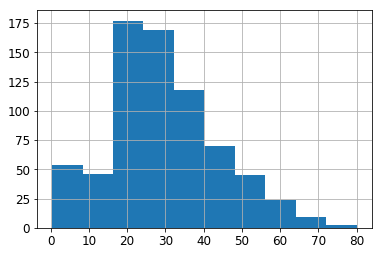

In [36]:
data["Age"].hist()